In [1]:
import pandas as pd
raw_data = pd.read_csv("../allData/BROWARD_ORIGINAL.csv")
#raw_data.set_index('id')

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,8/14/13,Male,4/18/47,69,Greater than 45,Other,0,...,1,Low,8/14/13,7/7/14,7/14/14,0,0,327,0,0
3,kevon dixon,kevon,dixon,1/27/13,Male,1/22/82,34,25 - 45,African-American,0,...,1,Low,1/27/13,1/26/13,2/5/13,0,9,159,1,1
4,ed philo,ed,philo,4/14/13,Male,5/14/91,24,Less than 25,African-American,0,...,3,Low,4/14/13,6/16/13,6/16/13,4,0,63,0,1
5,marcu brown,marcu,brown,1/13/13,Male,1/21/93,23,Less than 25,African-American,0,...,6,Medium,1/13/13,NaN,NaN,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,3/26/13,Male,1/22/73,43,25 - 45,Other,0,...,1,Low,3/26/13,NaN,NaN,2,0,1102,0,0
7,marsha miles,marsha,miles,11/30/13,Male,8/22/71,44,25 - 45,Other,0,...,1,Low,11/30/13,11/30/13,12/1/13,0,1,853,0,0
8,edward riddle,edward,riddle,2/19/14,Male,7/23/74,41,25 - 45,Caucasian,0,...,2,Low,2/19/14,3/31/14,4/18/14,14,5,40,1,1
9,steven stewart,steven,stewart,8/30/13,Male,2/25/73,43,25 - 45,Other,0,...,3,Low,8/30/13,5/22/14,6/3/14,3,0,265,0,0
10,elizabeth thieme,elizabeth,thieme,3/16/14,Female,6/3/76,39,25 - 45,Caucasian,0,...,1,Low,3/16/14,3/15/14,3/18/14,0,2,747,0,0


# Demographic


## estimate bias

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness


raw_data = pd.read_csv("../allData/BROWARD_ORIGINAL.csv")
#raw_data.rename(columns={"decile_score": "score"})
#raw_data.set_index('id')
#raw_data['label_value']


Text(0.5,1,'two_year_recid')

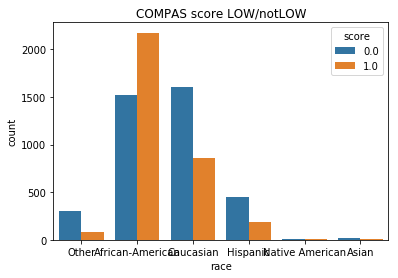

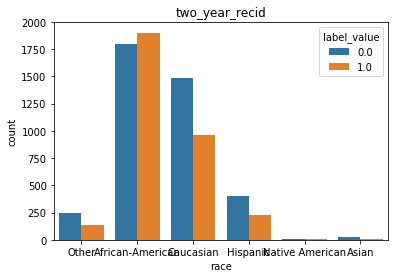

In [90]:
#risk of recid
raw_data.loc[raw_data['score_text'] == 'Low', 'score'] = 0
raw_data.loc[raw_data['score_text'] != 'Low', 'score'] = 1

#actual rate
raw_data.loc[raw_data['two_year_recid'] == 0, 'label_value'] = 0
raw_data.loc[raw_data['two_year_recid'] == 1, 'label_value'] = 1

plt.figure()
#g = sns.countplot(x="race", hue="score", data=raw_data[raw_data.race.isin(['African-American', 'Caucasian', 'Hispanic'])])
g = sns.countplot(x="race", hue="score", data=raw_data)
plt.title('COMPAS score LOW/notLOW')

plt.figure()
#g = sns.countplot(x="race", hue="label_value", data=raw_data[raw_data.race.isin(['African-American', 'Caucasian', 'Hispanic'])])
g = sns.countplot(x="race", hue="label_value", data=raw_data)
plt.title('two_year_recid')


,c
race,
African-American,1.483713
Asian,1.818182
Caucasian,3.117130
Hispanic,3.210848
Native American,1.000000
Other,5.891445


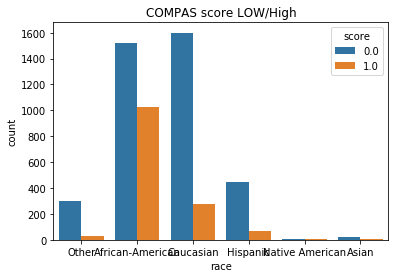

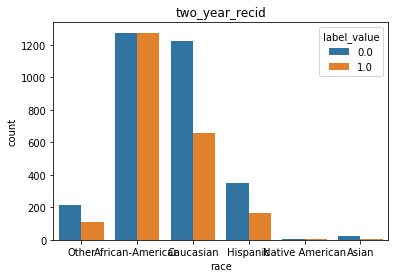

In [104]:
raw_data.loc[raw_data['score_text'] == 'Low', 'score'] = 0
raw_data.loc[raw_data['score_text'] == 'Medium', 'score'] = None
raw_data.loc[raw_data['score_text'] == 'High', 'score'] = 1

#actual rate
raw_data.loc[raw_data['two_year_recid'] == 0, 'label_value'] = 0
raw_data.loc[raw_data['two_year_recid'] == 1, 'label_value'] = 1
raw_data.loc[raw_data['score_text'] == 'Medium', 'label_value'] = None

plt.figure()
#g = sns.countplot(x="race", hue="score", data=raw_data[raw_data.race.isin(['African-American', 'Caucasian', 'Hispanic'])])
g = sns.countplot(x="race", hue="score", data=raw_data)
plt.title('COMPAS score LOW/High')

plt.figure()
#g = sns.countplot(x="race", hue="label_value", data=raw_data[raw_data.race.isin(['African-American', 'Caucasian', 'Hispanic'])])
g = sns.countplot(x="race", hue="label_value", data=raw_data)
plt.title('two_year_recid')
#fig, ax =plt.subplots(1,2)
#sns.countplot(x="race", hue="score", data=raw_data, ax=ax[0])
#sns.countplot(x="race", hue="label_value", data=raw_data, ax=ax[1])

d1 = raw_data[['race', 'score']].groupby(['race']).agg(lambda df: len(df.loc[df['score'] == 0.0])/len(df.loc[df['score'] == 1.0]))

d2 = raw_data[['race', 'label_value']].groupby(['race']).agg(lambda df: len(df.loc[df['label_value'] == 0.0])/len(df.loc[df['label_value'] == 1.0]))

d1.rename(columns={"score": "c"}, inplace = True)
d2.rename(columns={"label_value": "c"}, inplace = True)
d1/d2



In [122]:
import numpy as np
#raw_data['days_b_screening_arrest']
#raw_data['days_b_screening_arrest'].fillna(-1, inplace=True)
#raw_data.fillna(-1, inplace=True) # TODO properly
#raw_data.replace(np.nan, 'aaaa', inplace = True)['days_b_screening_arrest']
#raw_data['days_b_screening_arrest']
raw_data = raw_data[['race', 'sex', 'age_cat', 'score', 'label_value']]
raw_data, attr_cols_input = preprocess_input_df(raw_data, required_cols=['score', 'label_value'])
#df.replace(np.nan, None)
g = Group()
xtab, _ = g.get_crosstabs(raw_data, attr_cols = ['race', 'sex', 'age_cat'])

model_id, score_thresholds 1 {'rank_abs': [1403]}
COUNTS::: race
African-American    3696
Asian                 32
Caucasian           2454
Hispanic             637
Native American       18
Other                377
dtype: int64
COUNTS::: sex
Female    1395
Male      5819
dtype: int64
COUNTS::: age_cat
25 - 45            4109
Greater than 45    1576
Less than 25       1529
dtype: int64


### Cross-table with false-positives, false-negatives and so on

In [123]:
xtab[['attribute_name', 'attribute_value', 'fpr', 'fnr', 'tpr', 'tnr', 'for', 'fdr', 'group_size']].round(2)
#FOR = FN/(FN + TN)
#FDR false discovery rate

,attribute_name,attribute_value,fpr,fnr,tpr,tnr,for,fdr,group_size
0,race,African-American,0.22,0.42,0.58,0.78,0.20,0.28,3696
1,race,Asian,0.05,0.60,0.40,0.95,0.10,0.33,32
2,race,Caucasian,0.07,0.70,0.30,0.93,0.21,0.29,2454
3,race,Hispanic,0.08,0.77,0.23,0.92,0.23,0.43,637
4,race,Native American,0.17,0.17,0.83,0.83,0.08,0.17,18
5,race,Other,0.03,0.82,0.18,0.97,0.26,0.23,377
6,sex,Female,0.11,0.62,0.38,0.89,0.16,0.38,1395
7,sex,Male,0.14,0.54,0.46,0.86,0.22,0.27,5819
8,age_cat,25 - 45,0.14,0.54,0.46,0.86,0.21,0.28,4109
9,age_cat,Greater than 45,0.05,0.78,0.22,0.95,0.20,0.38,1576


### Disparity

In [110]:
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, {'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'})

#bdf.columns
bdf[['attribute_name', 'attribute_value', 'ppr_disparity', 'pprev_disparity', 'fdr_disparity', 'for_disparity', 'fpr_disparity', 'fnr_disparity']]
#'ppr': predicted_pos_ratio_k,
#'pprev': predicted_pos_ratio_g,



get_disparity_predefined_group()


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity
0,race,African-American,3.713768,2.465797,0.944101,0.941011,3.357560,0.594684
1,race,Asian,0.010870,0.833560,1.135802,0.488743,0.684624,0.853796
2,race,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,race,Hispanic,0.242754,0.935192,1.474848,1.069232,1.258761,1.099199
4,race,Native American,0.021739,2.963768,0.567901,0.393709,2.510288,0.237166
5,race,Other,0.094203,0.613193,0.786325,1.211413,0.422291,1.164267
6,sex,Female,0.156636,0.653382,1.416557,0.730038,0.781151,1.166136
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,age_cat,Greater than 45,0.155718,0.405993,1.356344,0.916371,0.382003,1.437288


### Fairness

In [119]:
f = Fairness(tau=0.3)
fdf = f.get_group_value_fairness(bdf)
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,TNR Parity,Impact Parity,Statistical Parity,FPR Parity,FOR Parity,FDR Parity,NPV Parity,TPR Parity,Precision Parity,FNR Parity,TypeII Parity,Equalized Odds,TypeI Parity,Supervised Fairness,Unsupervised Fairness
0,1,binary 0/1,age_cat,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False
1,1,binary 0/1,race,True,True,False,False,True,True,True,True,True,False,False,False,False,False,False
2,1,binary 0/1,sex,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False


In [120]:
fdf[['attribute_name', 'attribute_value','Statistical Parity',
       'Impact Parity', 'FDR Parity', 'FPR Parity', 'FOR Parity', 'FNR Parity',
       'TypeI Parity', 'TypeII Parity', 'Unsupervised Fairness',
       'Supervised Fairness']]

,attribute_name,attribute_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,race,African-American,False,True,True,False,True,True,False,True,False,False
1,race,Asian,False,True,True,True,True,True,True,True,False,True
2,race,Caucasian,True,True,True,True,True,True,True,True,True,True
3,race,Hispanic,False,True,True,True,True,True,True,True,False,True
4,race,Native American,False,True,True,True,True,False,True,False,False,False
5,race,Other,False,True,True,True,True,True,True,True,False,True
6,sex,Female,False,True,True,True,True,True,True,True,False,True
7,sex,Male,True,True,True,True,True,True,True,True,True,True
8,age_cat,25 - 45,True,True,True,True,True,True,True,True,True,True
9,age_cat,Greater than 45,False,True,True,True,True,True,True,True,False,True
